### CAR PRICE PREDICTION USING DECISION TREE

In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv(r"C:\Users\Gaurav\Downloads\car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### CHECK THE CATEGORIES OF DIFFERENT COLUMNS

In [9]:
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [10]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [11]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### CHECKING THE OUTLIERS FOR PRESENT_PRICE COLUMN

In [15]:
df['Present_Price'].describe()

count    301.000000
mean       7.628472
std        8.644115
min        0.320000
25%        1.200000
50%        6.400000
75%        9.900000
max       92.600000
Name: Present_Price, dtype: float64

In [16]:
# IMPORT the visual libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x20f9259e570>,
 'caps': [<matplotlib.lines.Line2D at 0x20f9259ea50>,
 'boxes': [<matplotlib.lines.Line2D at 0x20f9259e300>],
 'medians': [<matplotlib.lines.Line2D at 0x20f9259f0b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20f9259f380>],
 'means': []}

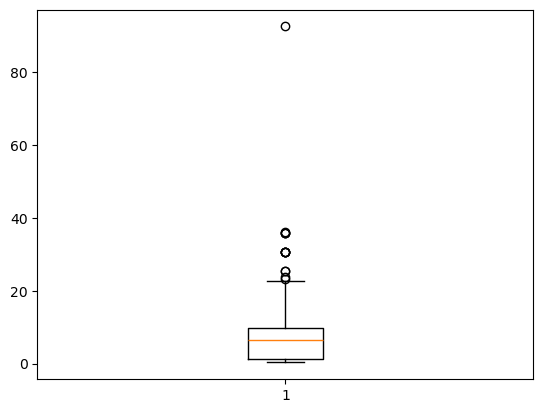

In [17]:
# plot the graph with boxplot for checking the outliers
plt.boxplot(df['Present_Price'])

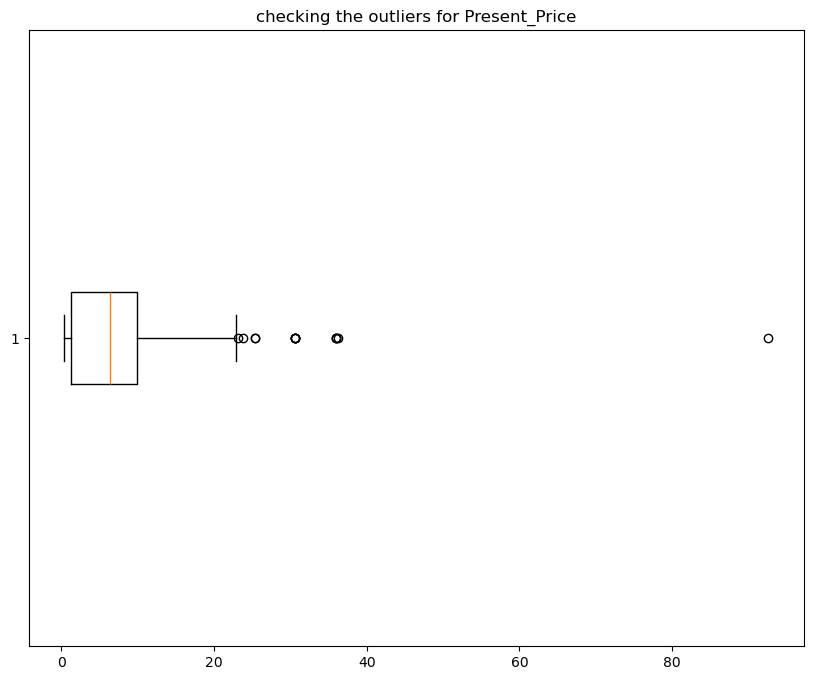

In [18]:
# plot the graph with boxplot for checking the outliers
plt.figure(figsize = (10,8))
plt.boxplot(df['Present_Price'], vert = False)
plt.title('checking the outliers for Present_Price')
plt.show()

### FINDING THE IQR

In [20]:
q3 = df['Present_Price'].quantile(0.75)
q1 = df['Present_Price'].quantile(0.25)

In [21]:
print(q3)
print(q1)

9.9
1.2


In [22]:
# difine the IQR
IQR = q3 - q1

In [23]:
IQR

8.700000000000001

### Setting up the outliers Limit

In [25]:
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

In [26]:
print('Upper Limit is : ', upper_limit)
print('Lower Limit is : ', lower_limit)

Upper Limit is :  22.950000000000003
Lower Limit is :  -11.850000000000001


### Finding the Outliers with above limit

In [28]:
# check for the upper limit
df[df['Present_Price'] > upper_limit]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,innova,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
79,fortuner,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0
82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0


In [29]:
len(df[df['Present_Price'] > upper_limit])

14

In [30]:
# check outliers for the lower limit
df[df['Present_Price'] < lower_limit]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner


### Trimming the data (removing the detected outliers)

In [32]:
data = df[(df['Present_Price'] > lower_limit) & (df['Present_Price'] < upper_limit)]

In [33]:
# shape of new data
data.shape


(287, 9)

### check the outliers for the new data

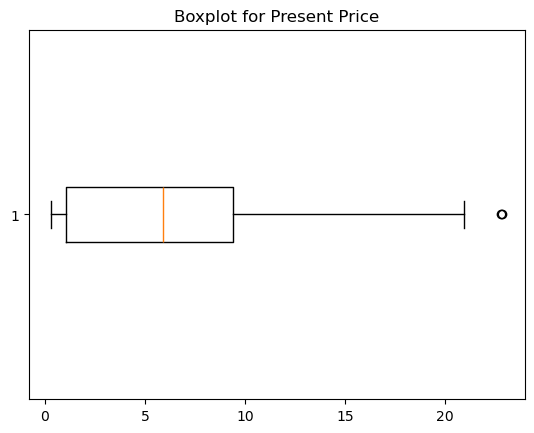

In [35]:
plt.boxplot(data['Present_Price'], vert = False)
plt.title('Boxplot for Present Price')
plt.show()


### Distribution of Numerical data

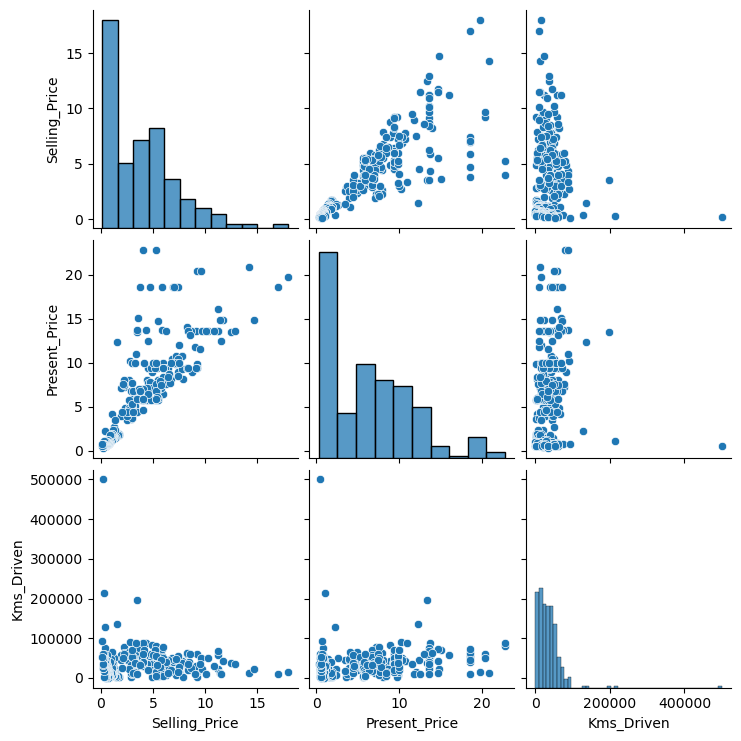

In [37]:
feauture = ['Selling_Price','Present_Price','Kms_Driven']
sns.pairplot(data[feauture])
plt.show()


In [38]:
data['Car_Name'].value_counts()

Car_Name
city                      26
corolla altis             16
verna                     14
brio                      10
ciaz                       9
                          ..
Hero Honda CBZ extreme     1
Bajaj Pulsar RS200         1
Honda Activa 125           1
TVS Jupyter                1
Bajaj Pulsar  NS 200       1
Name: count, Length: 96, dtype: int64

### we have to encode our texual data column -- Fuel type, seller type and transmission

In [40]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [41]:
newdata = pd.get_dummies(data, columns = ['Fuel_Type','Seller_Type','Transmission'],
 drop_first = True)


In [42]:
newdata.shape

(287, 10)

In [43]:
newdata

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,True,False,False,True
297,brio,2015,4.00,5.90,60000,0,False,True,False,True
298,city,2009,3.35,11.00,87934,0,False,True,False,True
299,city,2017,11.50,12.50,9000,0,True,False,False,True


### Data spliting into X and y

In [45]:
X = newdata.drop(columns = ['Car_Name','Selling_Price'])

In [46]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True


In [47]:
X.shape

(287, 8)

In [48]:
# output column
y = newdata[['Selling_Price']]

In [49]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


### Splitting the data into training and Testing

In [56]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, random_state = 4)

In [63]:
print(X_train.shape)
print(X_test.shape)


(243, 8)
(44, 8)


### Model Training

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
model = DecisionTreeRegressor(max_leaf_nodes = 50)

In [70]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=50)

### Predictions

In [73]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array([ 4.932     ,  0.59071429,  1.08388889, 11.5       ,  7.        ,
        1.08388889,  0.59071429,  0.59071429,  6.35      ,  0.32714286,
        5.59      , 18.        ,  0.59071429,  6.825     ,  2.8925    ,
       18.        ,  2.8925    ,  9.45      ,  2.8925    ,  0.32714286,
        0.32714286,  0.59071429, 11.175     ,  5.3375    ,  8.4875    ,
        3.7225    ,  2.1       ,  2.8925    ,  5.165     ,  9.25      ,
       12.7       ,  5.165     ,  0.32714286,  0.59071429,  1.08388889,
        4.33571429,  0.32714286,  6.05      ,  3.7225    ,  4.33571429,
        0.32714286,  2.8925    ,  0.59071429,  5.165     ])

### Accuracy check

In [78]:
from sklearn.metrics import r2_score

In [80]:
print(r2_score(y_test, y_pred)*100)

88.87511444604534


In [82]:
print((r2_score(y_test, y_pred)*100).round(2))

88.88


### predict the price for a new car data

In [85]:
model.predict([[2013,9.54,43000,0,1,0,0,1]])

array([6.05])